# Heart Disease Prediction
## Problem Statement
Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medical, as it is one of the leading disease related to unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or averion. In this study, we experiment with the heart disease dataset to explore the machine learning algorithms and build an optimum model to predict the disease.

## Feature Description
### Data Definition
Each attribute is a medical risk factor.

age: Age of the patient - (Numerical)

gender: Gender of the patient - (0,1) - (Male, Female) - (Categorical)

chest_pain: It refers to the chest pain experienced by the patient -(0,1,2,3) - (Categorical)

rest_bps: Blood pressure of the patient while resting(in mm/Hg) - (Numerical)

cholestrol: Patient's cholestrol level (in mg/dl) - (Numerical)

fasting_blood_sugar: Blood sugar of the patient while fasting - (>120mg/: = 1, otherwise = 0) - (Categorical)

rest_ecg: Potassium level (0,1,2) - (Categorical)

thalach: The patients maximum heart rate - (Numerical)

exer_angina: It refers to the exercise induced angina - (1=Yes, 0=No) - (Categorical)

old_peak: It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots) (Numerical)

slope: It refers to the slope of the peak of the exercise ST Segment- (0,1,2) - (Categorical)

ca: Number of major vessels - (0,1,2,3,4) - (Categorical)

thalassemia: It refers to thalassemia which is a blood disorder - (0,1,2,3) - (Categorical)

target: Patient has heart disease or not - (1=Yes, 0=No) - (Target variable)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
df=pd.read_csv('HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

### Understanding the Dataset

In [3]:
df1=df.copy()
df1.shape

(303, 14)

In [4]:
df1.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

### Checking for Data Types

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
cat_cols = ["gender","chest_pain","fasting_blood_sugar",
            "rest_ecg","exer_angina","slope","ca","thalassemia"]
for i in cat_cols:
    df1[i] = df1[i].astype("object")

<b> 1. For getting the statistical summary of numerical variables we use the describe()

In [7]:
df1.describe()

,age,rest_bps,cholestrol,thalach,old_peak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the age ranges from 29 to 77, with mean 54.366

<b>2. For getting the statistical summary of categorical features we use the describe(include = object)

In [8]:
df1.describe(include = object)

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
count,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4
top,1,0,0,1,0,2,0,2
freq,207,143,258,152,204,142,175,166


- The summary statistics for categorical variables contains information about the total number of observations, number of unique classes, the most occurring class, and its frequency.

- Lets understand the outputs of the above table using variable <b>'gender'<br></b>
count: Number of observations = 303<br>
unique: Number of unique classes in the column = 2 classes<br>
top: The most occurring class = 1<br>
frequency: Frequency of the most repeated class; out of 303 observations Reg has a frequency of 207<br>

### Checking For Null Values & Duplicates

In [9]:
df1.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [10]:
df1.duplicated().sum()

1

In [11]:
df1.drop_duplicates(inplace=True)
df1.shape

(302, 14)

### Univariate Data Analysis

In [12]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())   


age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

gender
1    206
0     96
Name: gender, dtype: int64

chest_pain
0    143
2     86
1     50
3     23
Name: chest_pain, dtype: int64

rest_bps
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1


<b>Numerical Columns

In [13]:
df1_numerical= df1.select_dtypes(include='number')

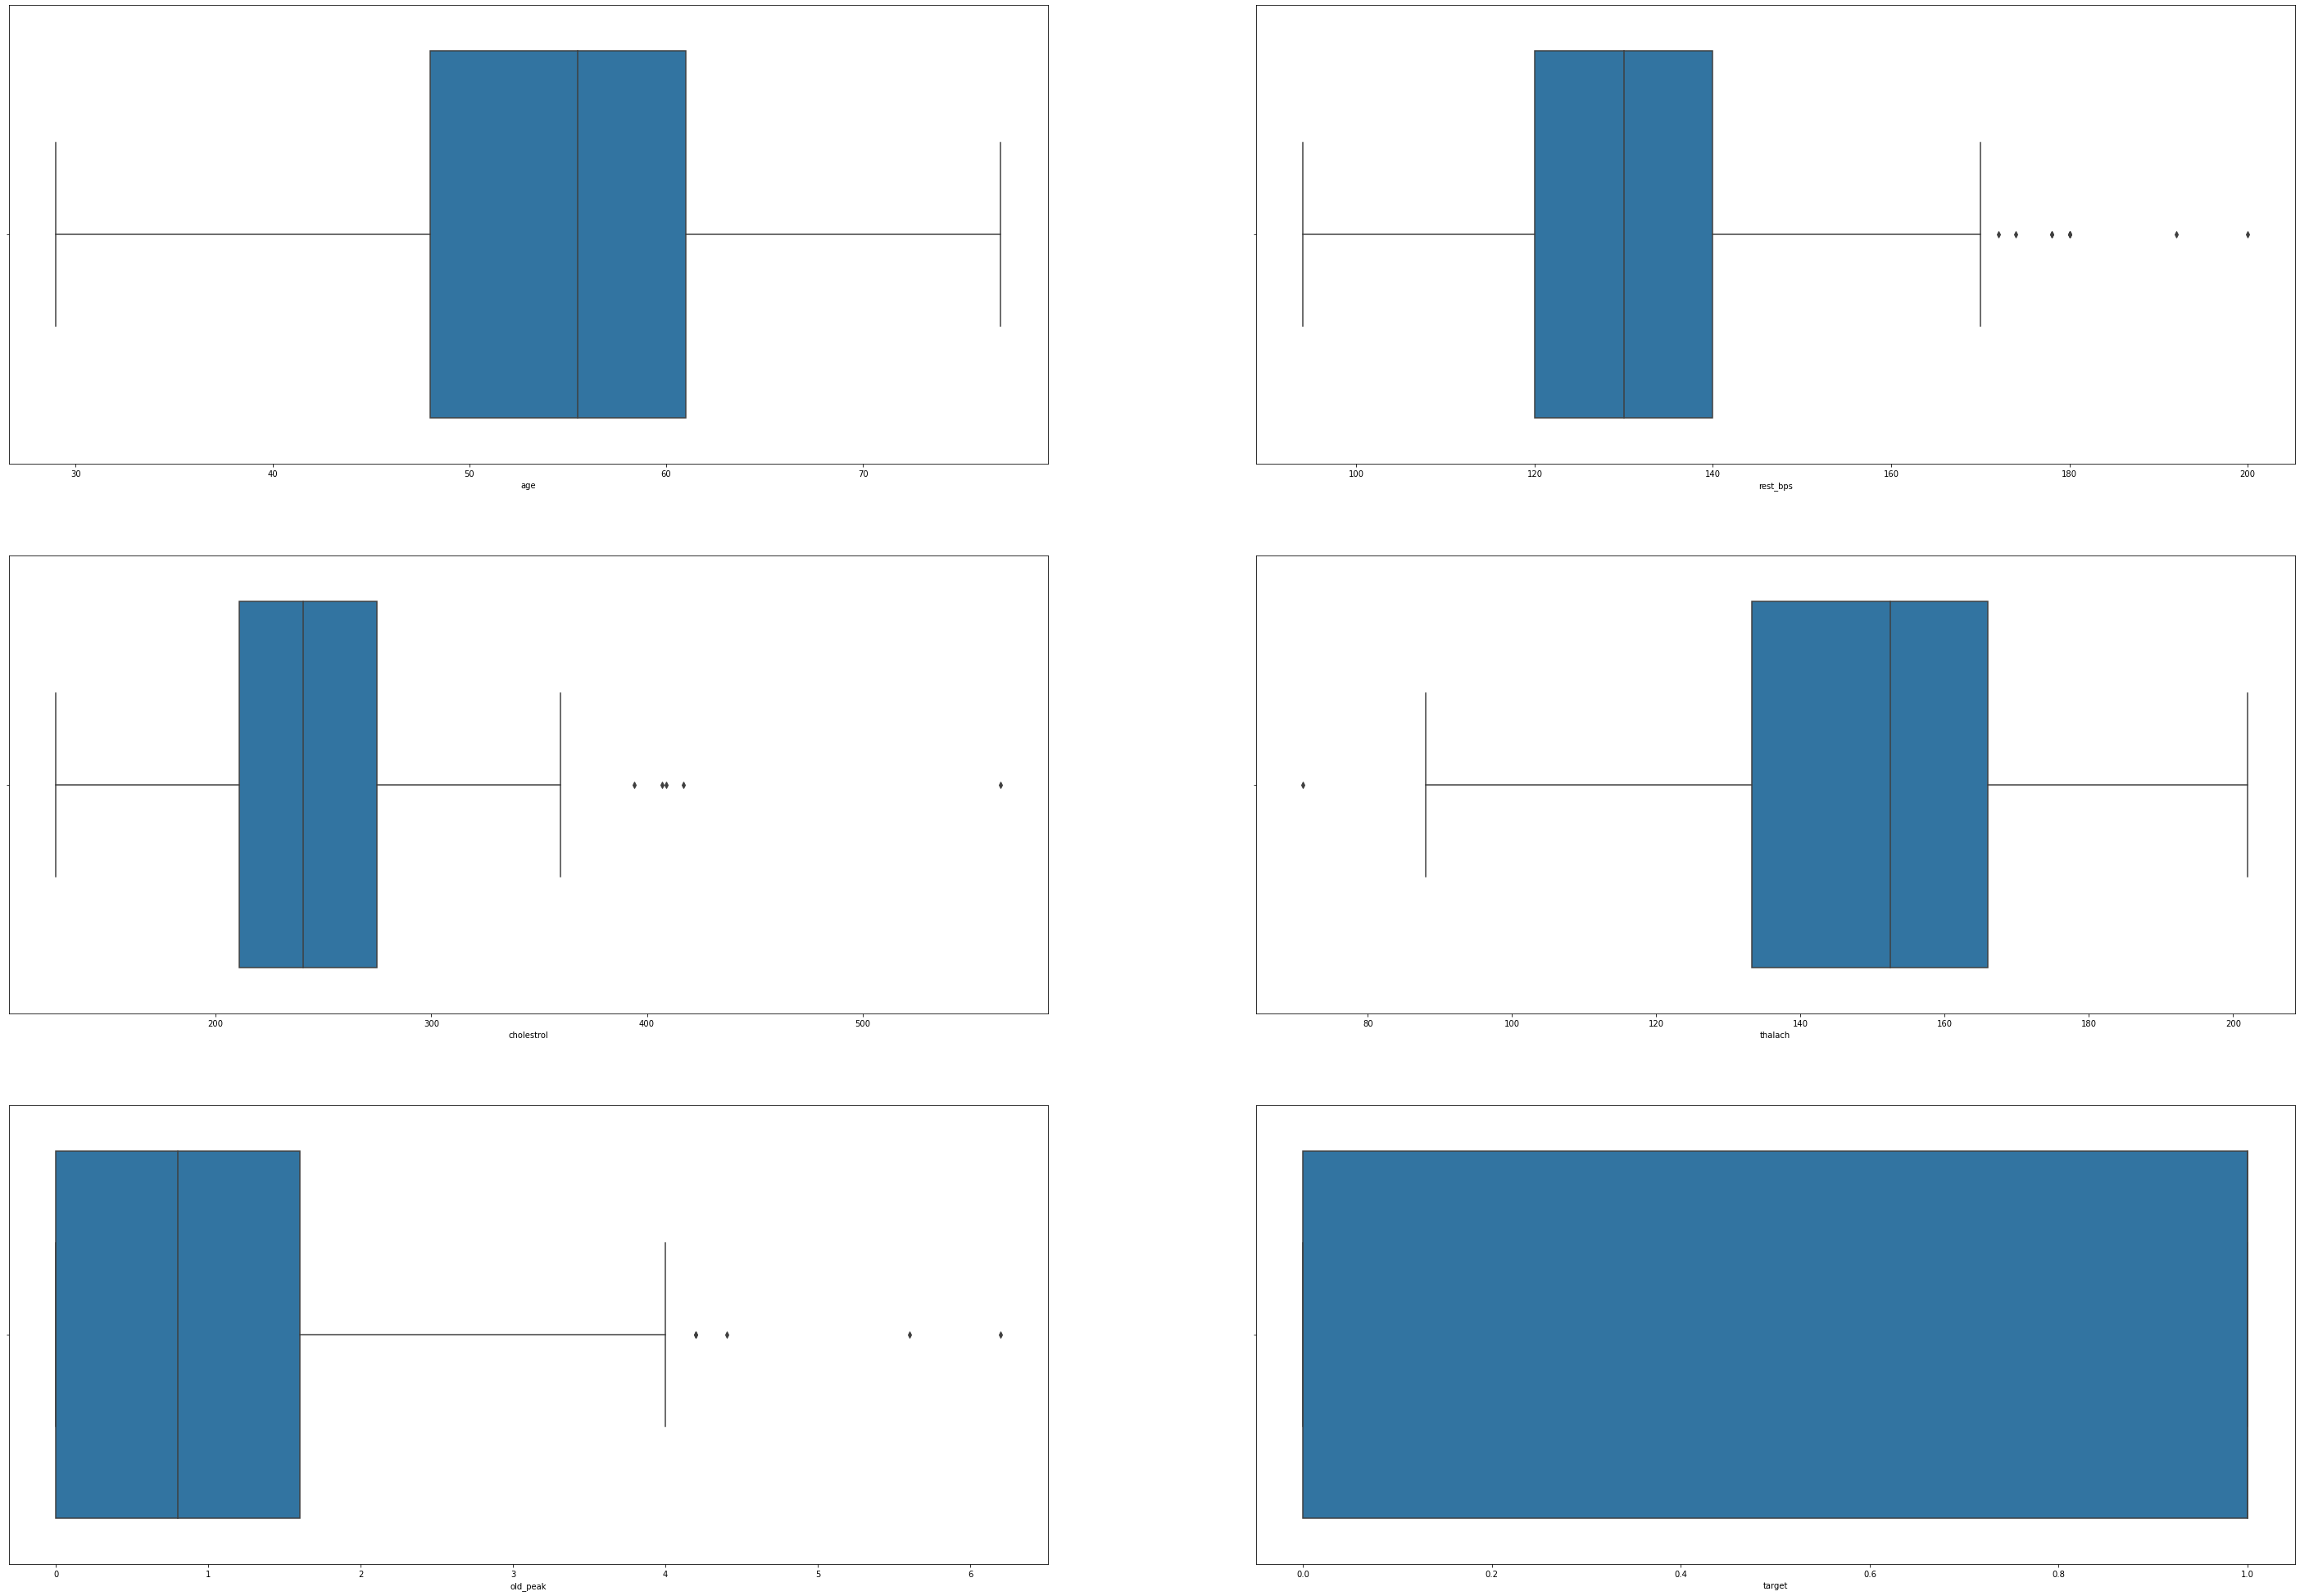

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (50, 35))

# plot the count plot using boxplot() for each numerical variable
for variable, subplot in zip(df1_numerical, ax.flatten()):
    sns.boxplot(df1_numerical[variable], ax = subplot)

- We can see the presence of outliers in the columns.

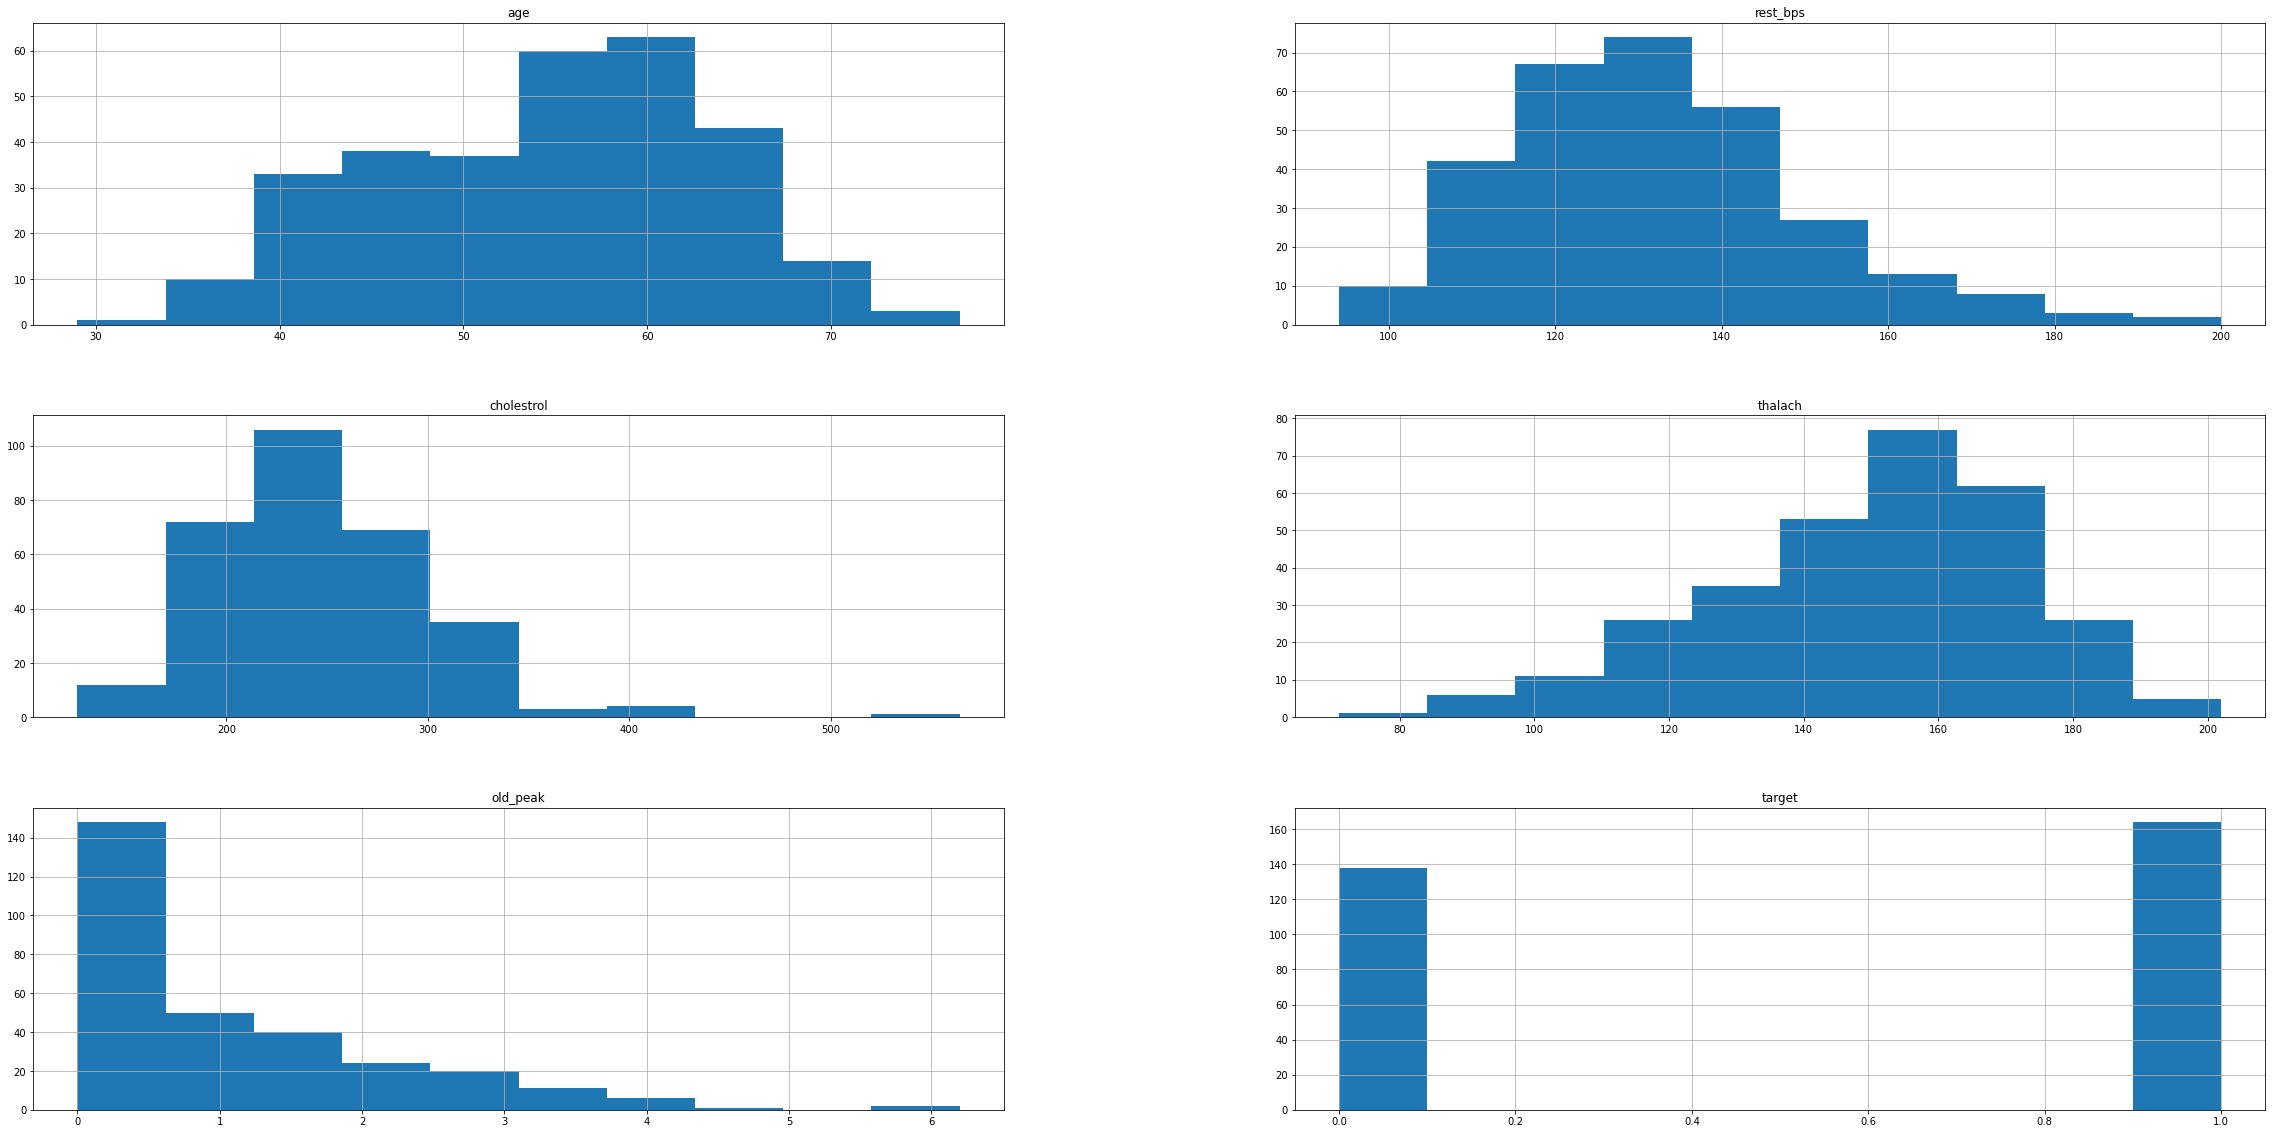

In [15]:
a=df1_numerical.hist(figsize=(40,20))

<b>Categorical Columns

In [1]:
df1_categorical= df1.select_dtypes(exclude='number')

NameError: name 'df1' is not defined

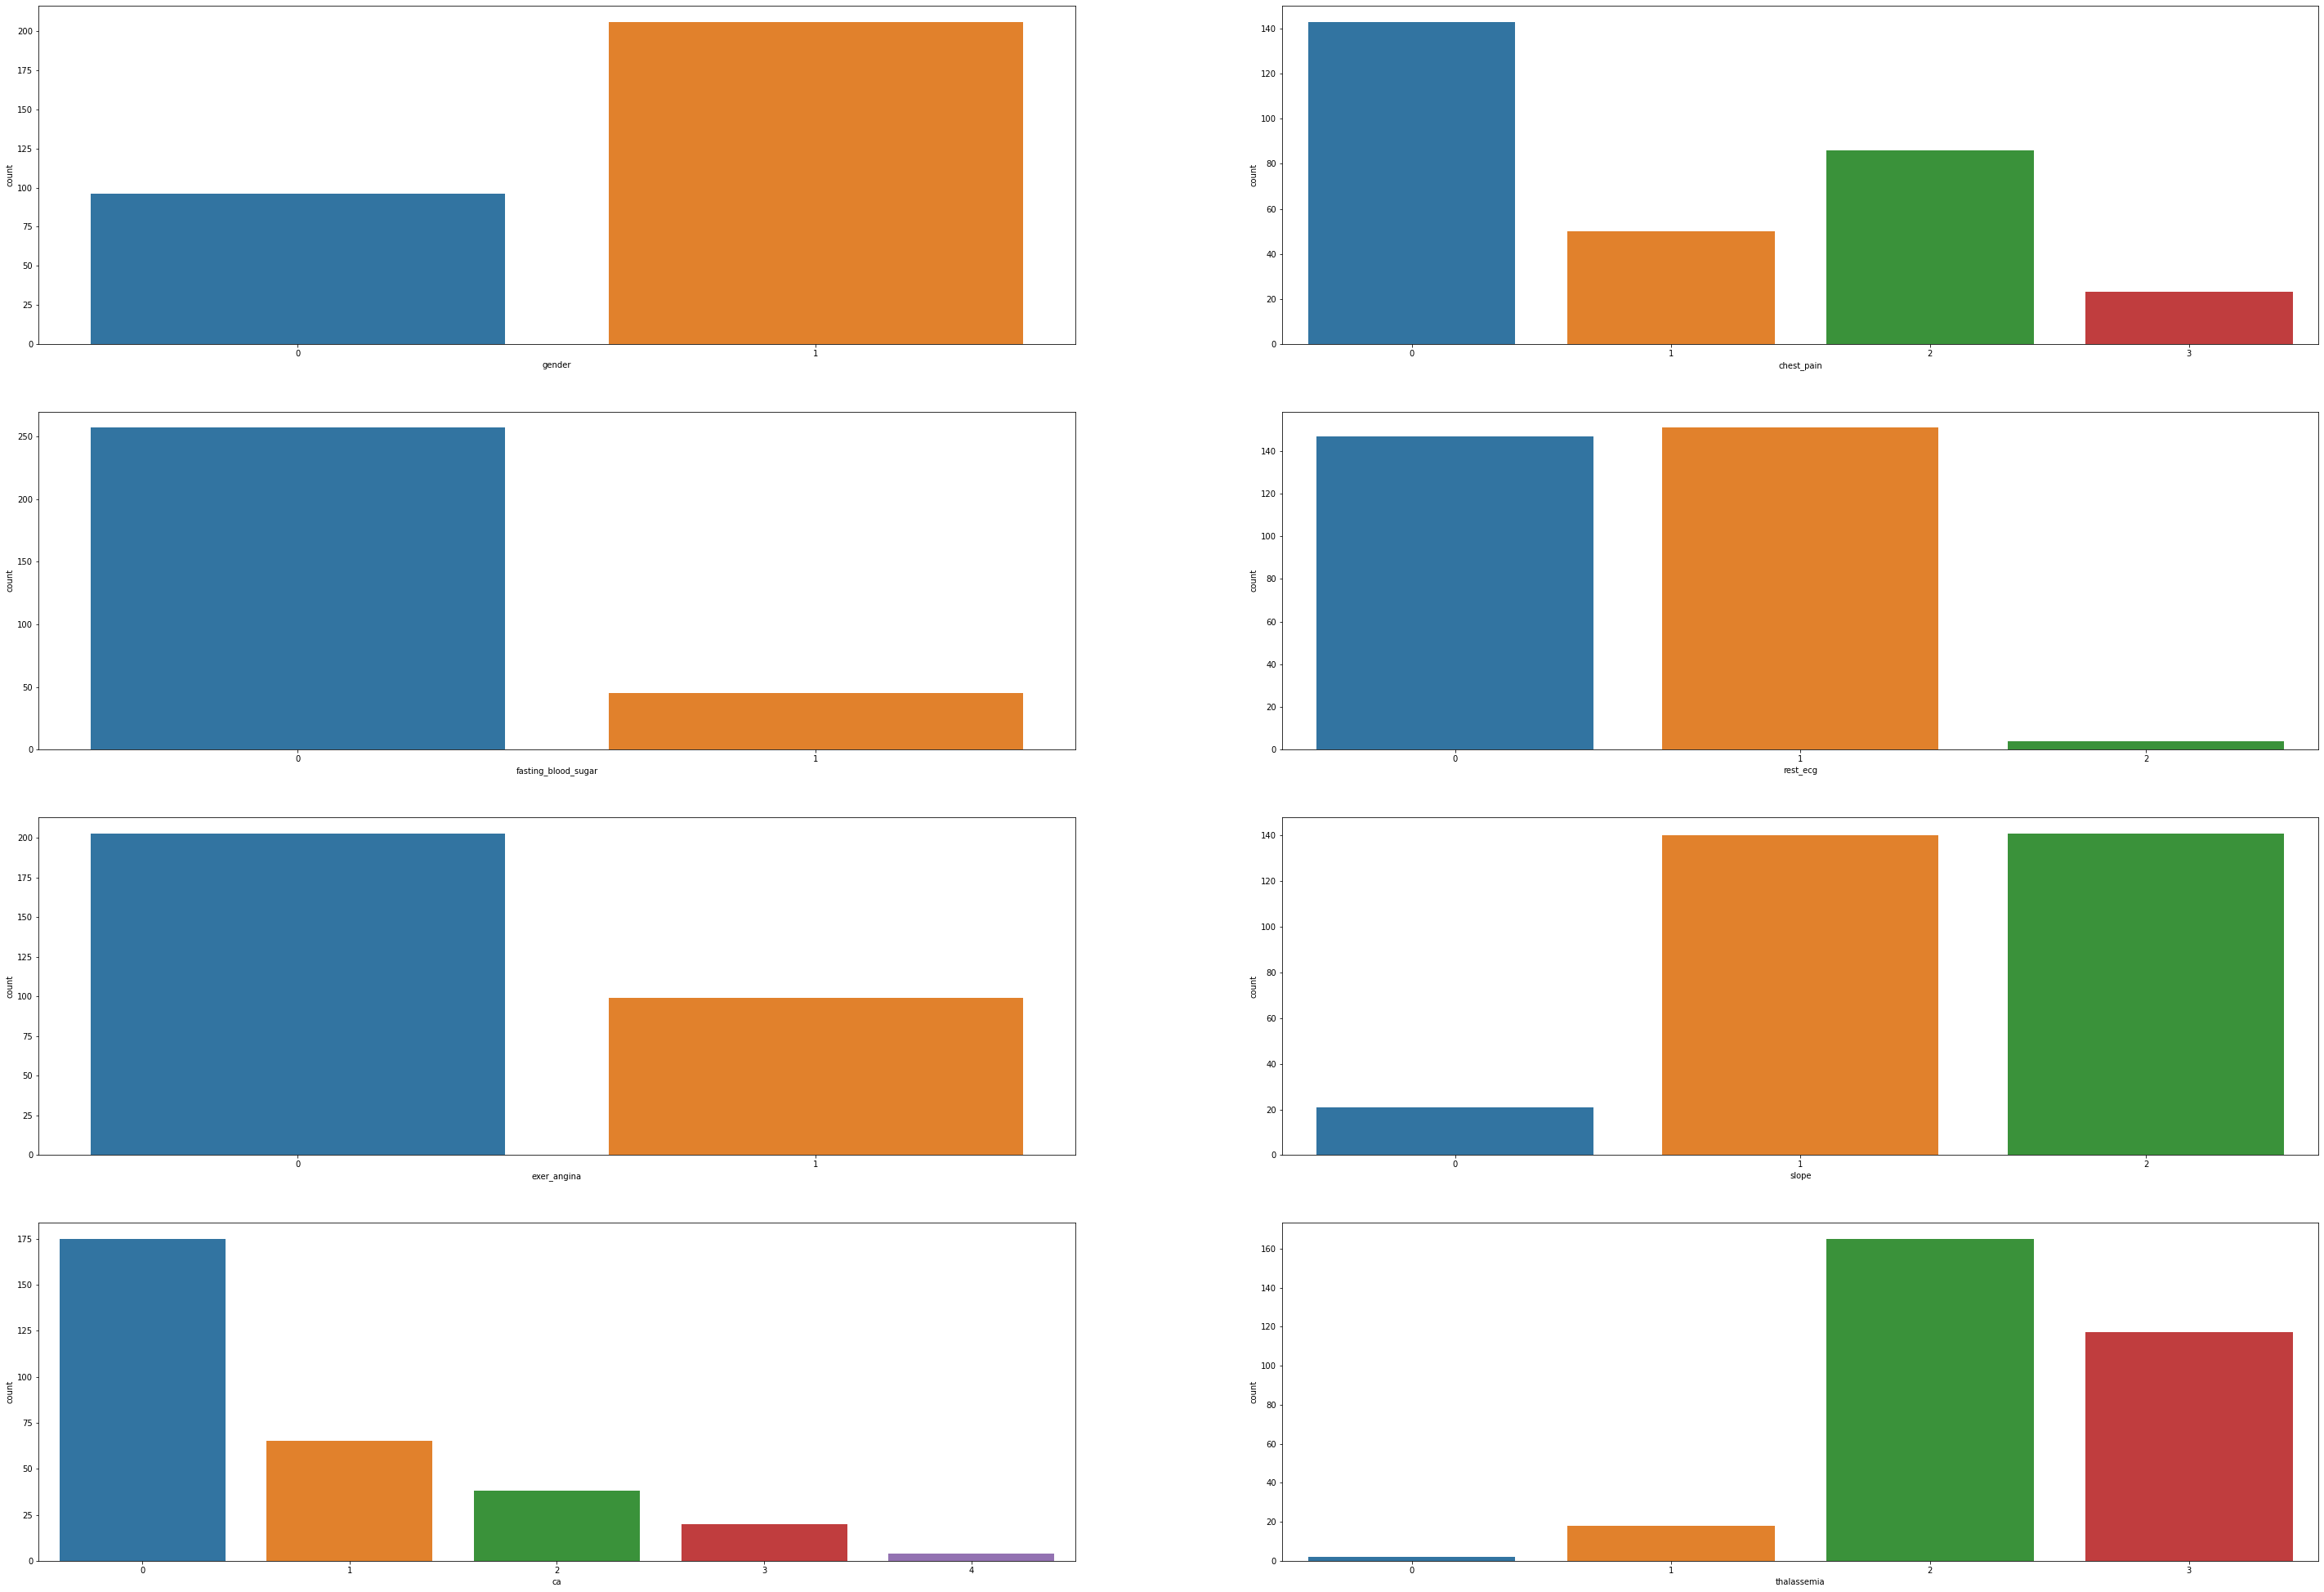

In [17]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(df1_categorical, ax.flatten()):
    sns.countplot(df1_categorical[variable], ax = subplot)

### Understanding Target Variable

In [18]:
df1['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

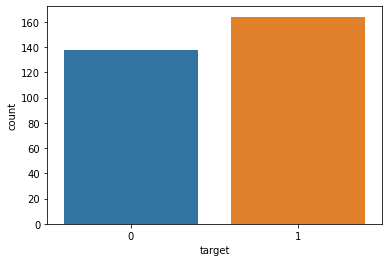

In [19]:
sns.countplot(x=df1['target'])
plt.show()

### Bivariate Data Analysis

In [20]:
df1_cat = [i for i in df1.columns if df1[i].dtypes=='object']
print(df1_cat)

['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']


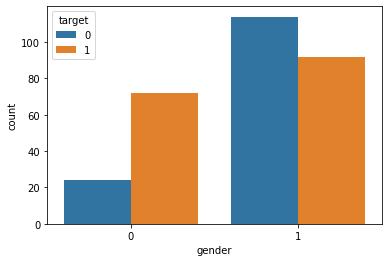

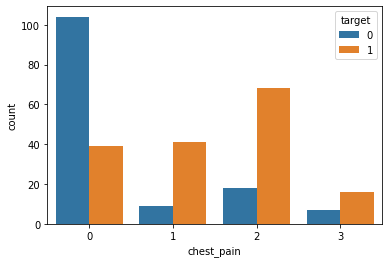

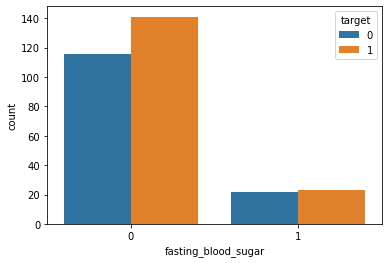

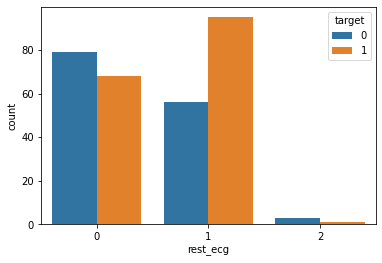

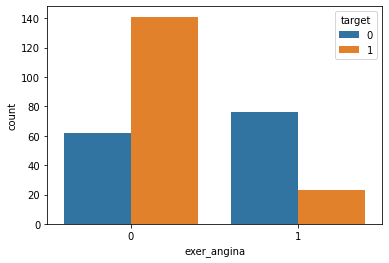

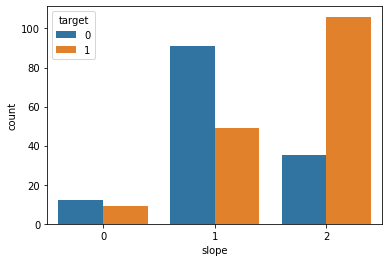

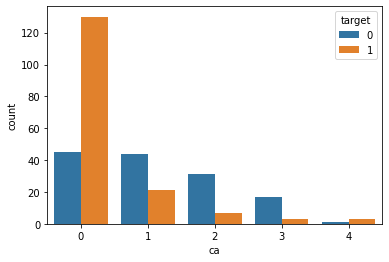

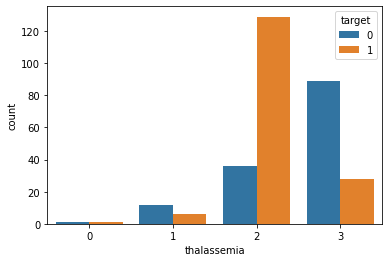

In [21]:
for i in df1_cat:
    sns.countplot(x = df1[i], hue=df1['target'])
    plt.show()

### Encode Categorical Variables
We need to perform label encoding on our categorical variables before we proceed further.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lb = LabelEncoder()
for i in df1_cat:
    df1[i] = lb.fit_transform(df1[i])

In [24]:
df1.dtypes.value_counts()

int64      13
float64     1
dtype: int64

### Correlation

In [25]:
corr=df1.corr
corr()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
gender,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
rest_bps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholestrol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fasting_blood_sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
rest_ecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exer_angina,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
old_peak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


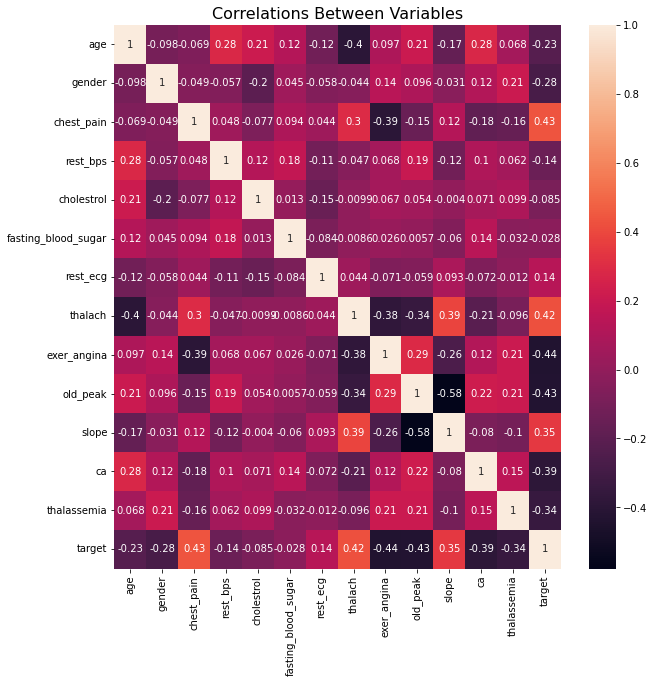

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlations Between Variables", size=16)
plt.show()

<b>There are'nt any high correlations between target column and other features

### Outlier Treatment

In [27]:
df1.describe(percentiles=[0.01,0.02,0.03,0.95,0.97,0.98,0.99])

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,35.00000,0.000000,0.000000,100.000000,149.000000,0.000000,0.000000,95.010000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2%,35.04000,0.000000,0.000000,101.020000,160.080000,0.000000,0.000000,97.040000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3%,38.00000,0.000000,0.000000,104.030000,167.030000,0.000000,0.000000,103.060000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
95%,68.00000,1.000000,3.000000,160.000000,326.950000,1.000000,1.000000,181.950000,1.000000,3.400000,2.000000,3.000000,3.000000,1.000000
97%,69.97000,1.000000,3.000000,170.000000,340.970000,1.000000,1.000000,184.970000,1.000000,3.600000,2.000000,3.000000,3.000000,1.000000


In [28]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.02))
    return x

In [29]:
df1=df1.apply(outlier_treatment)

In [30]:
df1.describe(percentiles=[0.02,0.98])

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.381722,0.682119,0.963576,131.521788,245.441788,0.149007,0.513245,149.593179,0.327815,1.027815,1.397351,0.705298,2.321192,0.543046
std,8.846113,0.466426,1.032044,17.000565,46.013012,0.356686,0.500654,22.242621,0.470196,1.110395,0.616274,0.969247,0.592994,0.498970
min,35.040000,0.000000,0.000000,101.020000,160.080000,0.000000,0.000000,97.040000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2%,35.079200,0.000000,0.000000,101.039600,160.158400,0.000000,0.000000,97.079200,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
98%,70.000000,1.000000,3.000000,177.841600,353.960400,1.000000,1.000000,186.960400,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000
max,70.000000,1.000000,3.000000,177.920000,353.980000,1.000000,1.000000,186.980000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


### We will now train models:

In [31]:
x=df1.drop('target',axis=1)
y=df1['target']

<b> 1. Split the data into training and test sets

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


### Building the model

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,KFold

In [35]:
def model_efficiency(y_test, y_pred):
    print("Classification Report:\n", classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred)
    confusion = pd.DataFrame(cm, index = ["Actual:0","Actual:1"], columns = ["Predicted:0","Predicted:1"])
    sns.heatmap(confusion, fmt ="d", annot= True)
    plt.show()

In [36]:
def plot_roc(y_test,y_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],"r--")
    plt.text(x = 0.02, y = 0.9, s =( "ROC AUC SCore:", roc_auc_score(y_test, y_prob).round(4)))
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.show()

### MLE Model-1

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix, roc_curve, roc_auc_score 
import statsmodels.api as sm
from sklearn import metrics

In [38]:
mle_model = sm.Logit(y_train, x_train).fit()
y_pred_prob_mle = mle_model.predict(x_test)

Optimization terminated successfully.
         Current function value: 0.326146
         Iterations 7


In [39]:
y_pred_mle = [0 if x <0.5 else 1 for x in y_pred_prob_mle]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



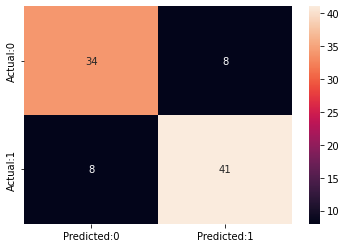

In [40]:
model_efficiency(y_test,y_pred_mle)

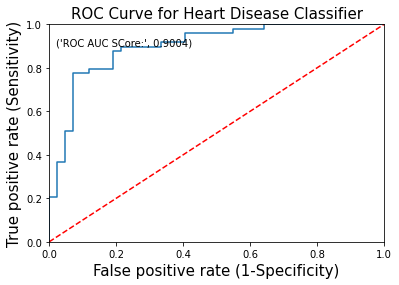

In [41]:
plot_roc(y_test,y_pred_prob_mle)

### MLE Model-2

In [42]:
mle_model1 = sm.Logit(y_train, x_train).fit()
y_pred_prob_mle_new = mle_model1.predict(x_test)

Optimization terminated successfully.
         Current function value: 0.326146
         Iterations 7


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84        42
           1       0.93      0.76      0.83        49

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.84      0.83        91



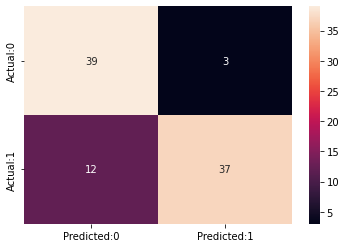

In [43]:
y_pred_mle_new = [0 if x<0.72 else 1 for x in y_pred_prob_mle_new]
model_efficiency(y_test, y_pred_mle_new)

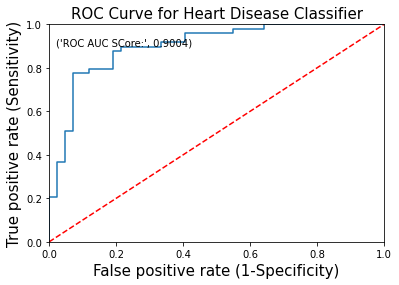

In [44]:
plot_roc(y_test,y_pred_prob_mle_new)

### SGD Model

In [93]:
sgd = SGDClassifier(loss ="log", max_iter = 1000, alpha = 0.01)
sgd_model = sgd.fit(x_train,y_train)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.73        42
           1       0.80      0.65      0.72        49

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.73      0.72        91



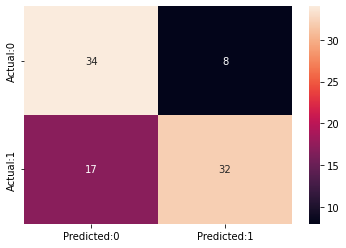

In [94]:
y_pred_prob_sgd = sgd.predict_proba(x_test)[:,1]
y_pred_sgd =sgd.predict(x_test)
model_efficiency(y_test,y_pred_sgd)

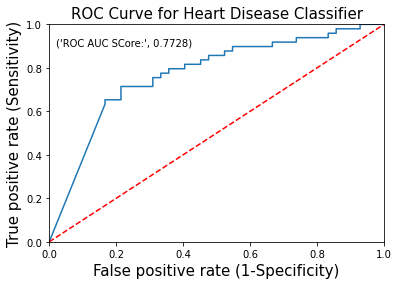

In [95]:
plot_roc(y_test,y_pred_prob_sgd)

## Decision Tree Models

### Model-1

In [48]:
m1=DecisionTreeClassifier()
m1.fit(x_train,y_train)

DecisionTreeClassifier()

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.89      0.82      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



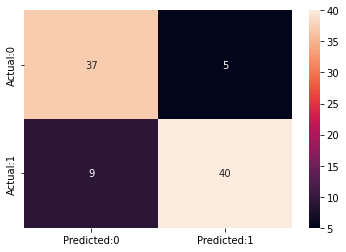

In [49]:
y_pred_prob_dt1 = m1.predict_proba(x_test)[:,1]
y_pred_dt1 = m1.predict(x_test)
model_efficiency(y_test, y_pred_dt1)

#### Plot Decision Tree

In [50]:
from sklearn.tree import plot_tree

In [51]:
fn=x_train.columns
#fn= feature names
cn=['0','1']
#cn= class names(caategories in target variable)

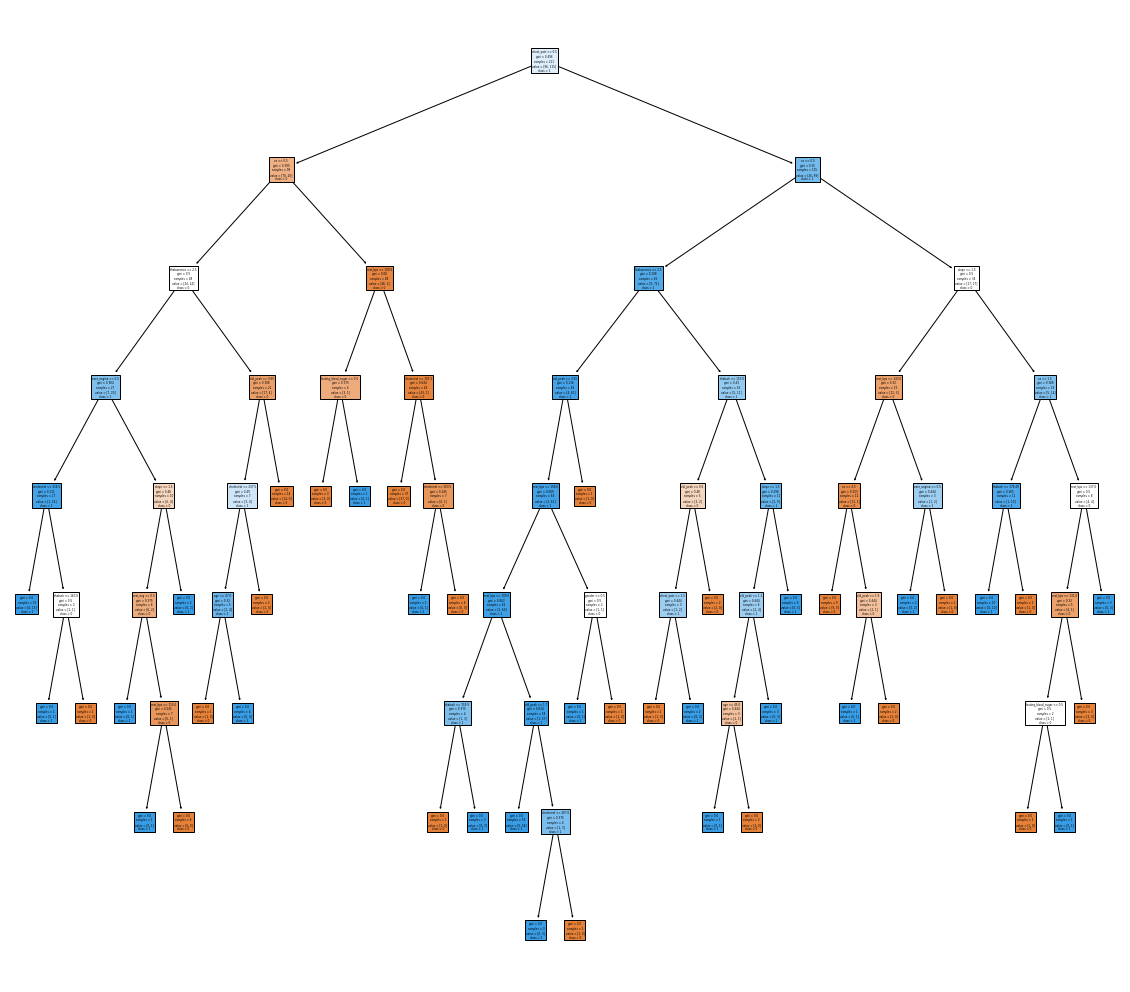

In [52]:
plt.figure(figsize=(20,18))
plot_tree(m1,feature_names=fn,class_names=cn,filled=True)
plt.show()

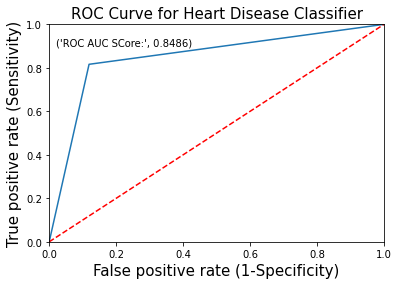

In [53]:
plot_roc(y_test, y_pred_prob_dt1)

### Model-2

In [54]:
m2=DecisionTreeClassifier(criterion='gini',max_depth=11,min_samples_split=30)
m2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_split=30)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



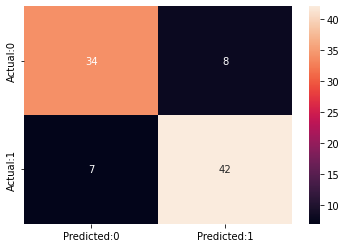

In [55]:
y_pred_prob_dt2 = m2.predict_proba(x_test)[:,1]
y_pred_dt2 = m2.predict(x_test)
model_efficiency(y_test, y_pred_dt2)

In [56]:
fn=x_train.columns
#fn= feature names
cn=['0','1']
#cn= class names(caategories in target variable)

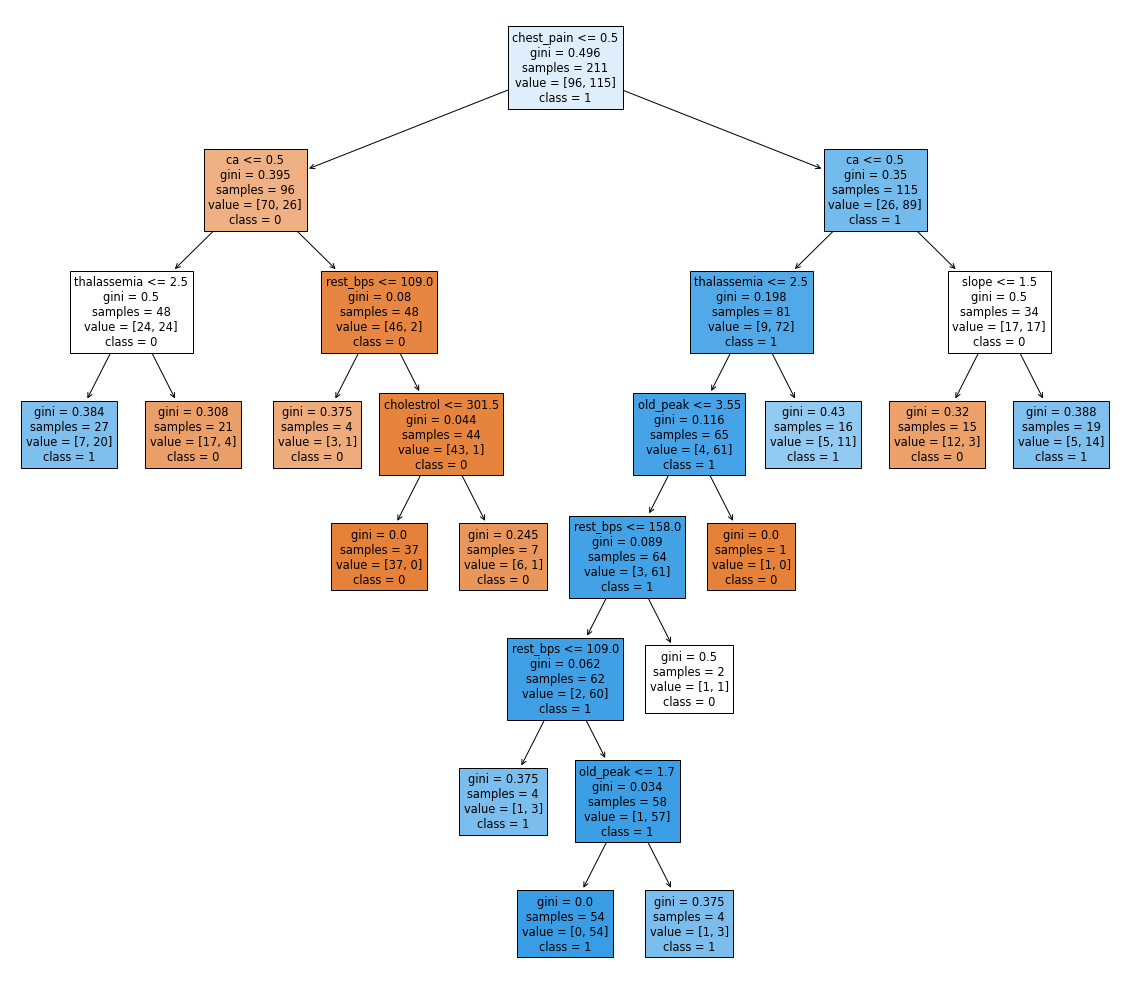

In [57]:
plt.figure(figsize=(20,18))
plot_tree(m2,feature_names=fn,class_names=cn,filled=True)
plt.show()

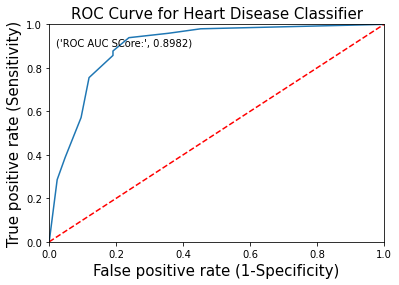

In [58]:
plot_roc(y_test, y_pred_prob_dt2)

### Normalization

In [59]:
fimp_m2=pd.DataFrame({'Features':x_train.columns,
                     'Imp': m2.tree_.compute_feature_importances(normalize=False),
                     'Norm_Imp':m2.feature_importances_})
fimp_m2.sort_values(by='Imp',ascending=False)

,Features,Imp,Norm_Imp
2,chest_pain,0.125519,0.430359
11,ca,0.082118,0.281552
12,thalassemia,0.041568,0.142520
10,slope,0.022898,0.078511
9,old_peak,0.010685,0.036634
3,rest_bps,0.007735,0.026520
4,cholestrol,0.001139,0.003904
0,age,0.000000,0.000000
1,gender,0.000000,0.000000
5,fasting_blood_sugar,0.000000,0.000000


### Model-3

In [60]:
m3=DecisionTreeClassifier(criterion='entropy',max_depth=11,min_samples_split=30)
m3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=30)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



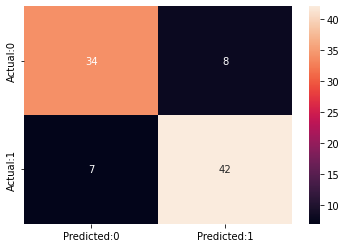

In [61]:
y_pred_prob_dt3 = m3.predict_proba(x_test)[:,1]
y_pred_dt3 = m3.predict(x_test)
model_efficiency(y_test, y_pred_dt3)

In [62]:
fn=x_train.columns
#fn= feature names
cn=['0','1']
#cn= class names(caategories in target variable)

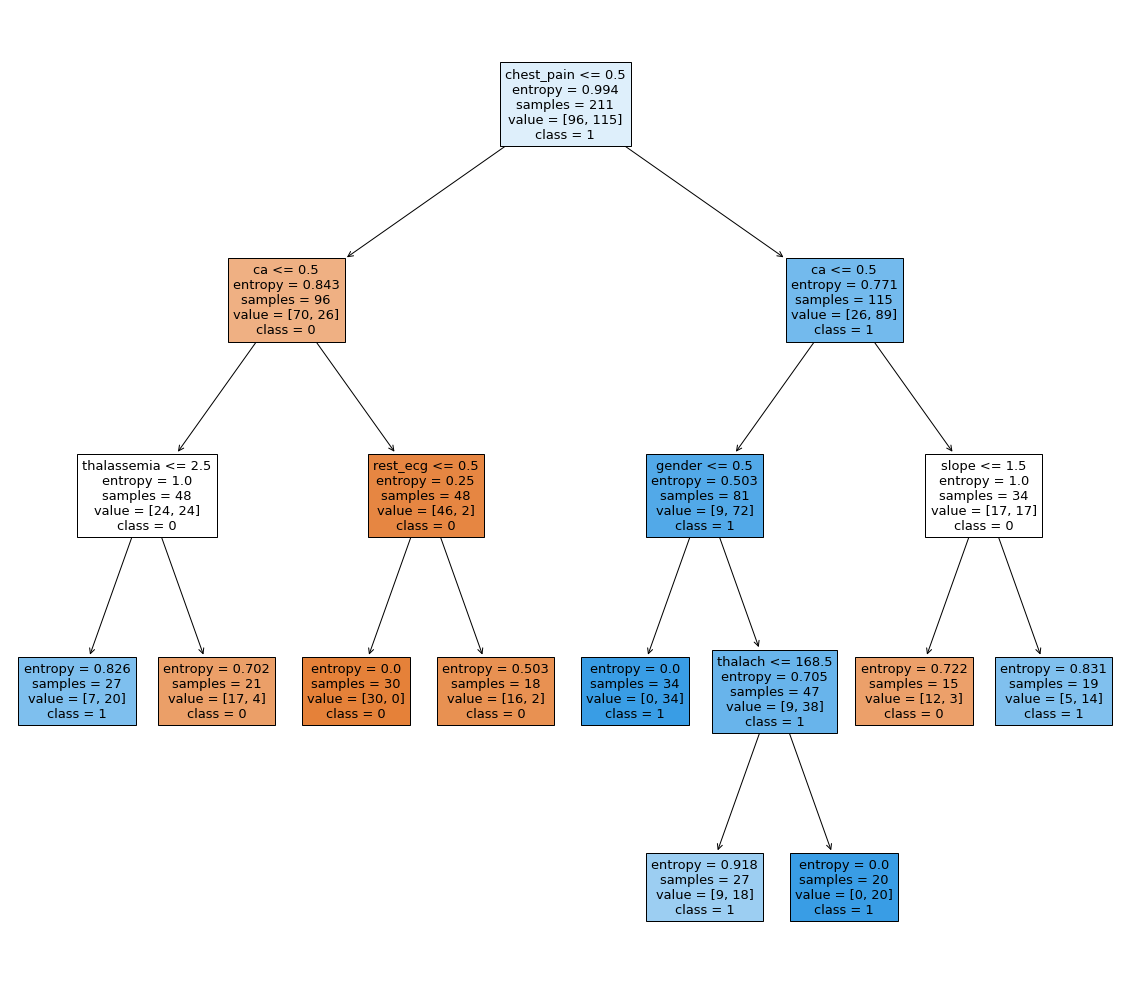

In [63]:
plt.figure(figsize=(20,18))
plot_tree(m3,feature_names=fn,class_names=cn,filled=True)
plt.show()

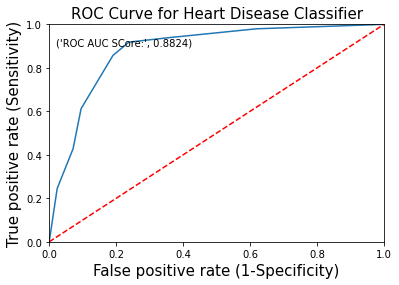

In [64]:
plot_roc(y_test, y_pred_prob_dt3)

### Rules

In [65]:
from sklearn import tree

In [66]:
rules_m3 = tree.export_text(m3,feature_names=fn.tolist())
print(rules_m3)

|--- chest_pain <= 0.50
|   |--- ca <= 0.50
|   |   |--- thalassemia <= 2.50
|   |   |   |--- class: 1
|   |   |--- thalassemia >  2.50
|   |   |   |--- class: 0
|   |--- ca >  0.50
|   |   |--- rest_ecg <= 0.50
|   |   |   |--- class: 0
|   |   |--- rest_ecg >  0.50
|   |   |   |--- class: 0
|--- chest_pain >  0.50
|   |--- ca <= 0.50
|   |   |--- gender <= 0.50
|   |   |   |--- class: 1
|   |   |--- gender >  0.50
|   |   |   |--- thalach <= 168.50
|   |   |   |   |--- class: 1
|   |   |   |--- thalach >  168.50
|   |   |   |   |--- class: 1
|   |--- ca >  0.50
|   |   |--- slope <= 1.50
|   |   |   |--- class: 0
|   |   |--- slope >  1.50
|   |   |   |--- class: 1



### Model Comparision

In [96]:
models=pd.DataFrame({"Model Name":["MLE Model (0.5 threshold)",
                            "MLE Model (0.72 threshold)",
                           "SGD Model","Decision Tree Model-1",
                           "Decision Tree Model-2","Decision Tree Model-3"],
             "F-1 Score":[metrics.f1_score(y_test,y_pred_mle),
                          metrics.f1_score(y_test,y_pred_mle_new),
                         metrics.f1_score(y_test,y_pred_sgd),
                         metrics.f1_score(y_test,y_pred_dt1),
                         metrics.f1_score(y_test,y_pred_dt2),
                         metrics.f1_score(y_test,y_pred_dt3)],
             "Accuracy":[metrics.accuracy_score(y_test,y_pred_mle),
                        metrics.accuracy_score(y_test,y_pred_mle_new),
                        metrics.accuracy_score(y_test,y_pred_sgd),
                        metrics.accuracy_score(y_test,y_pred_dt1),
                        metrics.accuracy_score(y_test,y_pred_dt2),
                        metrics.accuracy_score(y_test,y_pred_dt3)],
             "Recall":[metrics.recall_score(y_test,y_pred_mle),
                      metrics.recall_score(y_test,y_pred_mle_new),
                      metrics.recall_score(y_test,y_pred_sgd),
                      metrics.recall_score(y_test,y_pred_dt2),
                      metrics.recall_score(y_test,y_pred_dt2),
                      metrics.recall_score(y_test,y_pred_dt3)],
             "Precision":[metrics.precision_score(y_test,y_pred_mle),
                      metrics.precision_score(y_test,y_pred_mle_new),
                      metrics.precision_score(y_test,y_pred_sgd),
                      metrics.precision_score(y_test,y_pred_dt1),
                      metrics.precision_score(y_test,y_pred_dt2),
                      metrics.precision_score(y_test,y_pred_dt3)
                         ]})

In [97]:
models

,Model Name,F-1 Score,Accuracy,Recall,Precision
0,MLE Model (0.5 threshold),0.836735,0.824176,0.836735,0.836735
1,MLE Model (0.72 threshold),0.831461,0.835165,0.755102,0.925000
2,SGD Model,0.719101,0.725275,0.653061,0.800000
3,Decision Tree Model-1,0.851064,0.846154,0.857143,0.888889
4,Decision Tree Model-2,0.848485,0.835165,0.857143,0.840000
5,Decision Tree Model-3,0.848485,0.835165,0.857143,0.840000


### Conclusion:
- Models are performing at about 75% to 85 % accuracy.
- Decision Tree Model-1 is performing the best.

### Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score,KFold

### Applying Cross Validation on Max Depth

In [70]:
# md = max_depth
md = [4,5,6,7,8,9,11,13,15]
kf = KFold(n_splits=7)
for i in md:
    scores = cross_val_score(DecisionTreeClassifier(max_depth=i),x_train,y_train,cv=kf,scoring='accuracy')
    print(f'Scores at max_depth {i} is {scores}')
    print(f'Avg _Score at max_depth {i} is {scores.mean()}')

Scores at max_depth 4 is [0.83870968 0.66666667 0.76666667 0.73333333 0.7        0.8
 0.7       ]
Avg _Score at max_depth 4 is 0.7436251920122887
Scores at max_depth 5 is [0.80645161 0.66666667 0.86666667 0.7        0.7        0.7
 0.73333333]
Avg _Score at max_depth 5 is 0.7390168970814133
Scores at max_depth 6 is [0.83870968 0.66666667 0.76666667 0.66666667 0.7        0.73333333
 0.63333333]
Avg _Score at max_depth 6 is 0.7150537634408602
Scores at max_depth 7 is [0.83870968 0.56666667 0.83333333 0.63333333 0.73333333 0.7
 0.66666667]
Avg _Score at max_depth 7 is 0.7102918586789555
Scores at max_depth 8 is [0.83870968 0.63333333 0.76666667 0.66666667 0.73333333 0.7
 0.66666667]
Avg _Score at max_depth 8 is 0.7150537634408602
Scores at max_depth 9 is [0.80645161 0.6        0.76666667 0.7        0.7        0.7
 0.63333333]
Avg _Score at max_depth 9 is 0.7009216589861751
Scores at max_depth 11 is [0.87096774 0.6        0.83333333 0.7        0.7        0.63333333
 0.7       ]
Avg _Score 

### Applying Cross Validation on Min_Samples_Split

In [71]:
# mss = min_samples_split 
mss = [7,9,11,13,15,17,19,20,25,30,35]
kf = KFold(n_splits=6)
for i in mss:
    scores = cross_val_score(DecisionTreeClassifier(min_samples_split=i),x_train,y_train,scoring='accuracy',cv=kf)
    print(f'Scores at min_samples_split {i} is {scores}')
    print(f'Avg_Score at min_samples_split {i} is {scores.mean()}')

Scores at min_samples_split 7 is [0.80555556 0.77142857 0.71428571 0.82857143 0.8        0.71428571]
Avg_Score at min_samples_split 7 is 0.7723544973544975
Scores at min_samples_split 9 is [0.77777778 0.77142857 0.71428571 0.8        0.85714286 0.77142857]
Avg_Score at min_samples_split 9 is 0.782010582010582
Scores at min_samples_split 11 is [0.77777778 0.77142857 0.77142857 0.77142857 0.85714286 0.77142857]
Avg_Score at min_samples_split 11 is 0.7867724867724868
Scores at min_samples_split 13 is [0.80555556 0.77142857 0.77142857 0.77142857 0.85714286 0.77142857]
Avg_Score at min_samples_split 13 is 0.7914021164021164
Scores at min_samples_split 15 is [0.77777778 0.77142857 0.71428571 0.77142857 0.85714286 0.8       ]
Avg_Score at min_samples_split 15 is 0.782010582010582
Scores at min_samples_split 17 is [0.80555556 0.77142857 0.71428571 0.77142857 0.82857143 0.8       ]
Avg_Score at min_samples_split 17 is 0.781878306878307
Scores at min_samples_split 19 is [0.80555556 0.77142857 0.

### Applying CV on max_depth and min_samples_split

In [85]:
md = [5,6,7,8,9,11,13]
mss = [8,10,12,14,17,20,23,25,30,35]
kf = KFold(n_splits=5)
for i in md:
    for j in mss:
        scores = cross_val_score(DecisionTreeClassifier(max_depth=i,min_samples_split=j),
                                 x_train,y_train,scoring='accuracy',cv=kf)
        print(f'Scores at max_depth {i} and min_samples_split {j} is {scores}')
        print(f'Avg_Score at Scores at max_depth {i} and min_samples_split {j} is {scores.mean()}')

Scores at max_depth 5 and min_samples_split 8 is [0.76744186 0.78571429 0.73809524 0.78571429 0.80952381]
Avg_Score at Scores at max_depth 5 and min_samples_split 8 is 0.777297895902547
Scores at max_depth 5 and min_samples_split 10 is [0.79069767 0.76190476 0.73809524 0.80952381 0.78571429]
Avg_Score at Scores at max_depth 5 and min_samples_split 10 is 0.77718715393134
Scores at max_depth 5 and min_samples_split 12 is [0.79069767 0.76190476 0.73809524 0.80952381 0.78571429]
Avg_Score at Scores at max_depth 5 and min_samples_split 12 is 0.77718715393134
Scores at max_depth 5 and min_samples_split 14 is [0.76744186 0.76190476 0.73809524 0.80952381 0.76190476]
Avg_Score at Scores at max_depth 5 and min_samples_split 14 is 0.7677740863787376
Scores at max_depth 5 and min_samples_split 17 is [0.79069767 0.76190476 0.73809524 0.80952381 0.76190476]
Avg_Score at Scores at max_depth 5 and min_samples_split 17 is 0.7724252491694352
Scores at max_depth 5 and min_samples_split 20 is [0.76744186 

### HyperParameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
hparams_dt = {'criterion':['gini','entropy'],
            'max_depth':list(range(4,14)),
            'min_samples_split':[8,10,12,15,18,20,22,25,30,35]}
print(hparams_dt)

{'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'min_samples_split': [8, 10, 12, 15, 18, 20, 22, 25, 30, 35]}


In [88]:
dt = DecisionTreeClassifier()
gscv1 = GridSearchCV(dt,param_grid=hparams_dt,scoring='accuracy')
gscv1.fit(x_train,y_train)
gscv2 = GridSearchCV(dt,param_grid=hparams_dt,scoring='accuracy')
gscv2.fit(x_test,y_test)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                         'min_samples_split': [8, 10, 12, 15, 18, 20, 22, 25,
                                               30, 35]},
             scoring='accuracy')

In [89]:
print('Best Parameters:')
print(gscv1.best_params_)
print(gscv1.best_estimator_)

Best Parameters:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)


In [90]:
print(gscv2.best_params_)
print(gscv2.best_estimator_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 35}
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=35)


### Inference
1. Model performs best when following conditions hold true:
- (criterion='entropy', max_depth=5, min_samples_split=10)

### Model-4
<b> - based on result of best params obtained from GridSearchCV

In [78]:
print(gscv1.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [79]:
m4=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
m4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        42
           1       0.85      0.69      0.76        49

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.78      0.77      0.77        91



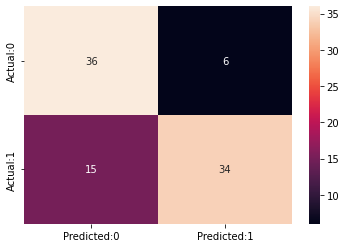

In [80]:
y_pred_prob_dt4 = m4.predict_proba(x_test)[:,1]
y_pred_dt4 = m4.predict(x_test)
model_efficiency(y_test, y_pred_dt4)

In [81]:
fn=x_train.columns
#fn= feature names
cn=['0','1']
#cn= class names(caategories in target variable)

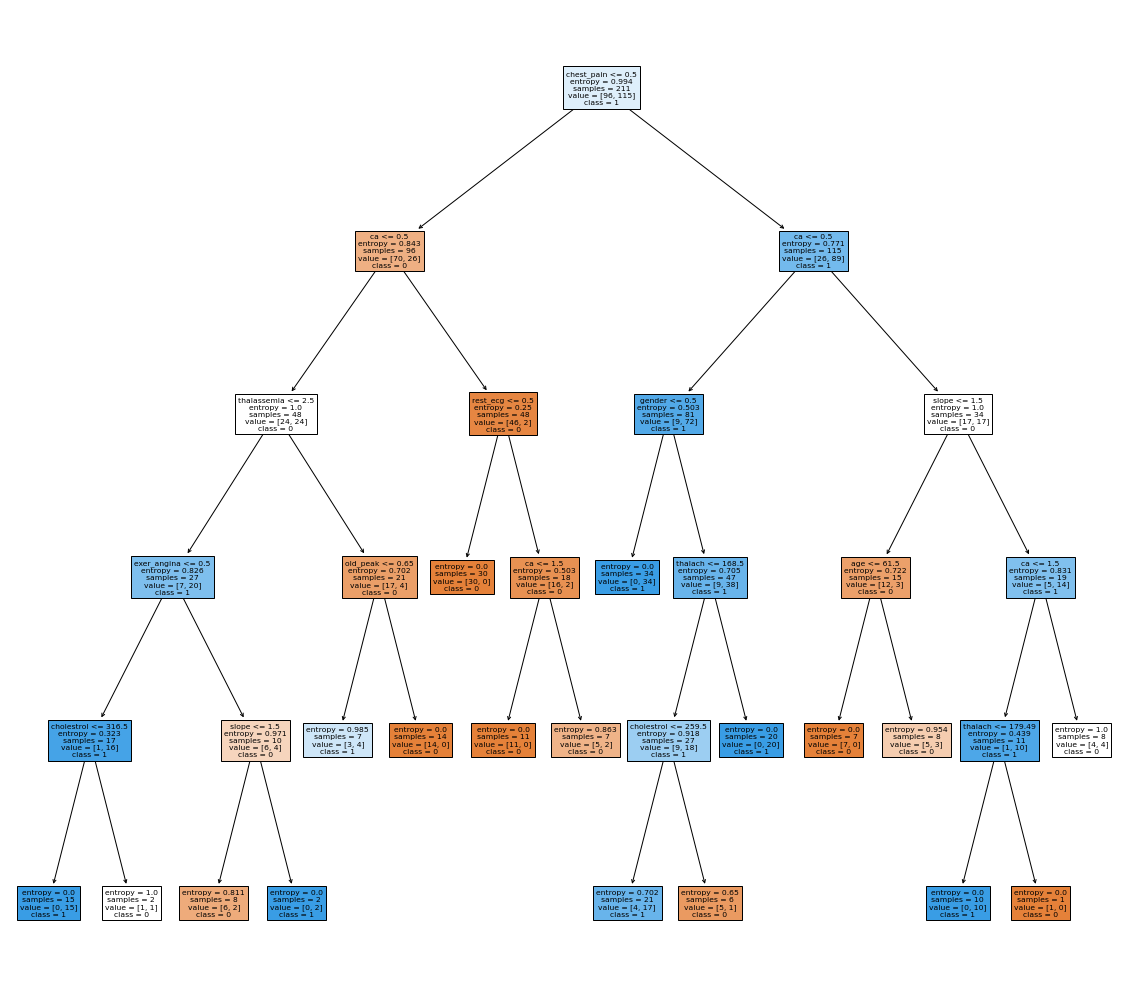

In [82]:
plt.figure(figsize=(20,18))
plot_tree(m4,feature_names=fn,class_names=cn,filled=True)
plt.show()

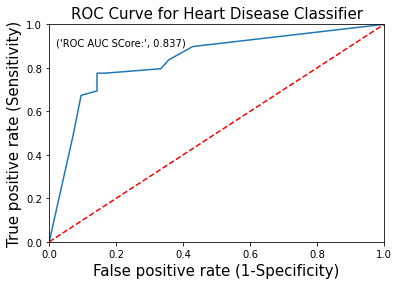

In [83]:
plot_roc(y_test, y_pred_prob_dt4)

In [98]:
new_row = {"Model Name":"Decision Tree Model-4",
           "F-1 Score":metrics.f1_score(y_test,y_pred_dt4),
           'Accuracy':metrics.accuracy_score(y_test,y_pred_dt4),
           "Recall":metrics.recall_score(y_test,y_pred_dt4),
           "Precision":metrics.precision_score(y_test,y_pred_dt4)
          }
models = models.append(new_row, ignore_index=True)
models

,Model Name,F-1 Score,Accuracy,Recall,Precision
0,MLE Model (0.5 threshold),0.836735,0.824176,0.836735,0.836735
1,MLE Model (0.72 threshold),0.831461,0.835165,0.755102,0.925000
2,SGD Model,0.719101,0.725275,0.653061,0.800000
3,Decision Tree Model-1,0.851064,0.846154,0.857143,0.888889
4,Decision Tree Model-2,0.848485,0.835165,0.857143,0.840000
5,Decision Tree Model-3,0.848485,0.835165,0.857143,0.840000
6,Decision Tree Model-4,0.764045,0.769231,0.693878,0.850000


### Conclusion
- After hyperparameter tuning we still find Decision Tree Model-1 performs better overall.